# Natural Language Processing

## Importing the libraries

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [107]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

## Cleaning the texts

In [108]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [109]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

## Creating the Bag of Words model

In [110]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Applying Classification Models

## Naive Bayes Classification Model

In [112]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [113]:
y_pred_nb = classifier_nb.predict(X_test)
print(np.concatenate((y_pred_nb.reshape(len(y_pred_nb),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

## Logistic Regression Model

In [114]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [115]:
y_pred_lr = classifier_lr.predict(X_test)
print(np.concatenate((y_pred_lr.reshape(len(y_pred_lr),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]

## Support Vector Machine - Linear

In [116]:
from sklearn.svm import SVC
classifier_lsvm = SVC(kernel = 'linear', random_state = 0)
classifier_lsvm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [117]:
y_pred_lsvm = classifier_lsvm.predict(X_test)
print(np.concatenate((y_pred_lsvm.reshape(len(y_pred_lsvm),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]

## Support Vector Machine - Kernel

In [118]:
from sklearn.svm import SVC
classifier_ksvm = SVC(kernel = 'rbf', random_state = 0)
classifier_ksvm.fit(X_train, y_train)

SVC(random_state=0)

In [119]:
y_pred_ksvm = classifier_ksvm.predict(X_test)
print(np.concatenate((y_pred_ksvm.reshape(len(y_pred_ksvm),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]

## K-Nearest Neighbors (K-NN)

In [120]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [121]:
y_pred_knn = classifier_knn.predict(X_test)
print(np.concatenate((y_pred_knn.reshape(len(y_pred_knn),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]

## Decision Tree Classification

In [122]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [123]:
y_pred_dt = classifier_dt.predict(X_test)
print(np.concatenate((y_pred_dt.reshape(len(y_pred_dt),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]

## Random Forest Classification

In [124]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100,criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [125]:
y_pred_rf = classifier_rf.predict(X_test)
print(np.concatenate((y_pred_rf.reshape(len(y_pred_rf),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]

# Results

## Naive Bayes

In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)

[[55 42]
 [12 91]]


<Axes: >

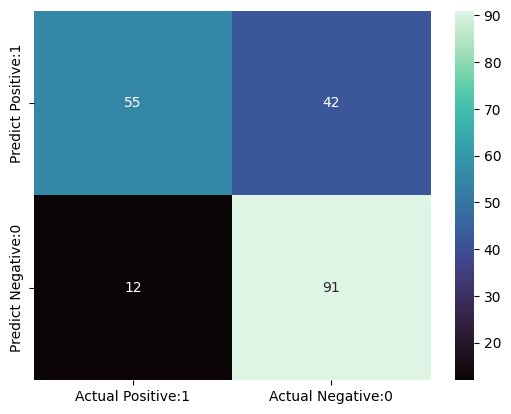

In [127]:
import seaborn as sns
cm_matrix_nb = pd.DataFrame(data=cm_nb, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_nb, annot=True, fmt='d', cmap='mako')

In [128]:
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred_nb)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred_nb)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred_nb)
print(f"F1 Score: {f1}")

Accuracy: 0.73
Precision: 0.6842105263157895
Recall: 0.883495145631068
F1 Score: 0.7711864406779663


## Logistic Regression

In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[80 17]
 [28 75]]


<Axes: >

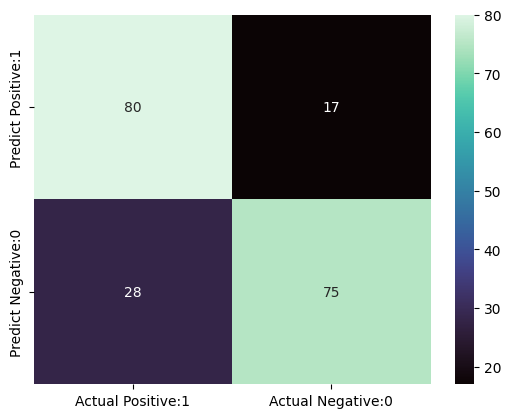

In [130]:
import seaborn as sns
cm_matrix_lr = pd.DataFrame(data=cm_lr, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_lr, annot=True, fmt='d', cmap='mako')

In [131]:
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred_lr)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred_lr)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred_lr)
print(f"F1 Score: {f1}")

Accuracy: 0.775
Precision: 0.8152173913043478
Recall: 0.7281553398058253
F1 Score: 0.7692307692307693


## SVM(Linear)

In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm_lsvm = confusion_matrix(y_test, y_pred_lsvm)
print(cm_lsvm)

[[79 18]
 [24 79]]


<Axes: >

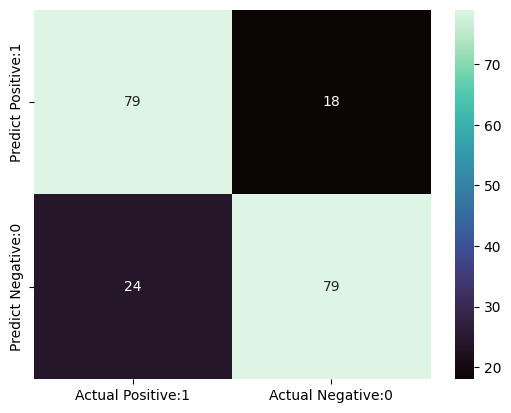

In [133]:
import seaborn as sns
cm_matrix_lsvm = pd.DataFrame(data=cm_lsvm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_lsvm, annot=True, fmt='d', cmap='mako')

In [134]:
accuracy = accuracy_score(y_test, y_pred_lsvm)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred_lsvm)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred_lsvm)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred_lsvm)
print(f"F1 Score: {f1}")

Accuracy: 0.79
Precision: 0.8144329896907216
Recall: 0.7669902912621359
F1 Score: 0.79


## SVM(Kernel)

In [135]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm_ksvm = confusion_matrix(y_test, y_pred_ksvm)
print(cm_ksvm)

[[89  8]
 [36 67]]


<Axes: >

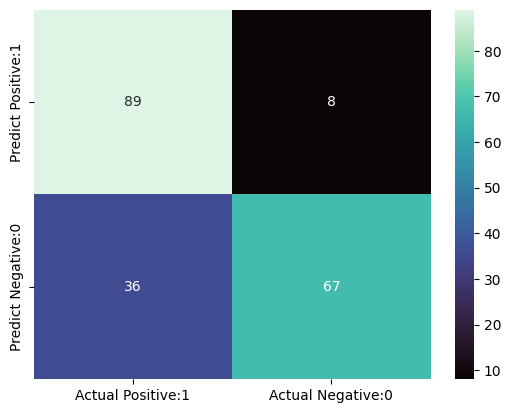

In [136]:
import seaborn as sns
cm_matrix_ksvm = pd.DataFrame(data=cm_ksvm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_ksvm, annot=True, fmt='d', cmap='mako')

In [137]:
accuracy = accuracy_score(y_test, y_pred_ksvm)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred_ksvm)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred_ksvm)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred_ksvm)
print(f"F1 Score: {f1}")

Accuracy: 0.78
Precision: 0.8933333333333333
Recall: 0.6504854368932039
F1 Score: 0.752808988764045


## KNN

In [138]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[85 12]
 [56 47]]


<Axes: >

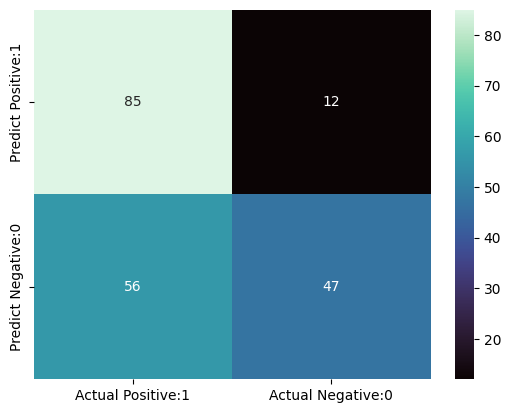

In [139]:
import seaborn as sns
cm_matrix_knn = pd.DataFrame(data=cm_knn, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_knn, annot=True, fmt='d', cmap='mako')

In [140]:
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred_knn)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred_knn)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred_knn)
print(f"F1 Score: {f1}")

Accuracy: 0.66
Precision: 0.7966101694915254
Recall: 0.4563106796116505
F1 Score: 0.580246913580247


## Decision Tree

In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[78 19]
 [31 72]]


<Axes: >

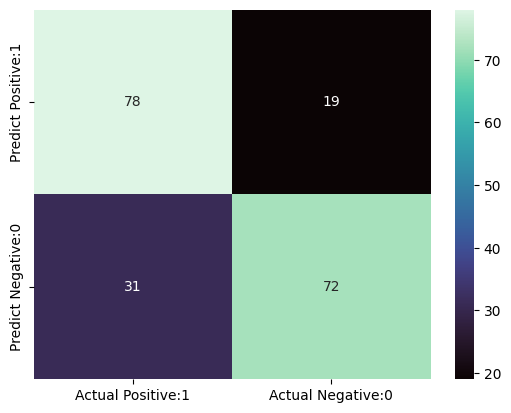

In [142]:
import seaborn as sns
cm_matrix_dt = pd.DataFrame(data=cm_dt, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_dt, annot=True, fmt='d', cmap='mako')

In [143]:
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred_dt)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred_dt)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred_dt)
print(f"F1 Score: {f1}")

Accuracy: 0.75
Precision: 0.7912087912087912
Recall: 0.6990291262135923
F1 Score: 0.7422680412371134


## Random Forest

In [144]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[91  6]
 [41 62]]


<Axes: >

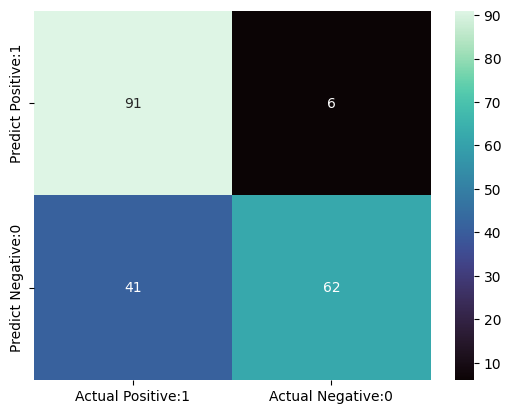

In [145]:
import seaborn as sns
cm_matrix_rf = pd.DataFrame(data=cm_rf, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_rf, annot=True, fmt='d', cmap='mako')

In [146]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred_rf)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred_rf)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred_rf)
print(f"F1 Score: {f1}")

Accuracy: 0.765
Precision: 0.9117647058823529
Recall: 0.6019417475728155
F1 Score: 0.7251461988304093


Kernel SVM - Linear has the best accuracy of 79% for this dataset